<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# Projeto de Análise Exploratória de Dados
---

<h1 align=left><font size = 7, style="color:rgb(300,0,0)">Diferença de medalista femininas e Masculinos?</font></h2>
<hr>

# Identificação

## Turma
Turma = *ANALISE EXPLORATORIA DE DADOS {TURMA 02A} 2023/2*

# Integrantes do Grupo
Ra 23018690 = *'Kaymmi Silva'*

Ra 23001461 = *'Matheus Gomes'*

Ra 22516220 = *'Iasmin de Melo'*

# Análise Exploratória de Dados dos Jogos Olímpicos

Neste projeto, realizaremos uma análise exploratória de dados (AED) sobre os Jogos Olímpicos. Vamos explorar o conjunto de dados que abrange todas as edições dos Jogos desde 1896 até 2016. Nosso objetivo é entender a diferença entre medalhistas femininas e masculinos.

## Origem dos Dados
Os dados foram coletados do repositório [The Olympics](https://github.com/rfordatascience/tidytuesday/tree/master/data/2021/2021-07-27) no GitHub. O conjunto de dados contém informações sobre atletas olímpicos, modalidades esportivas, eventos e resultados. Ele é composto por dois arquivos principais:

1. **athlete_events.csv**: Este arquivo contém 271116 linhas e 15 colunas. Cada linha corresponde a um atleta competindo em um evento olímpico individual. As colunas incluem informações como nome, sexo, idade, altura, peso, equipe, código do país e medalha conquistada.

   Colunas relevantes:
   - `ID`: Número único para cada atleta
   - `Name`: Nome do atleta
   - `Sex`: Sexo (M ou F)
   - `Age`: Idade (inteiro)
   - `Height`: Altura (em centímetros)
   - `Weight`: Peso (em quilogramas)
   - `Team`: Nome da equipe
   - `NOC`: Código do Comitê Olímpico Nacional
   - `Games`: Ano e temporada dos Jogos
   - `Medal`: Medalha (Ouro, Prata, Bronze ou NA)

2. **noc_regions.csv**: Este arquivo contém 230 linhas e 3 colunas. Cada linha corresponde a uma região geográfica.

   Colunas:
   - `NOC`: Código do Comitê Olímpico Nacional
   - `region`: Região geográfica
   - `notes`: Notas (opcional)

## Tratamento dos Dados
Vamos considerar apenas os resultados da temporada de verão (Summer) e limpar os dados em relação às linhas que não têm medalhas.

## Perguntas Relevantes
1. **Análise de Distribuição de Dados**: Vamos explorar a distribuição de idades, alturas e pesos dos atletas.
2. **Transformações dos Dados**: Realizaremos junção de dados entre os arquivos e normalizaremos os atributos relevantes.
3. **Tabelas de Contingência ou Agregações**: Investigaremos a relação entre medalhas e outras variáveis, como país e esporte.
4. **Análise de Correlação**: Verificaremos se existe correlação entre altura e peso dos atletas.
5. **Análise de Informação Mútua**: Exploraremos atributos derivados e testaremos a interdependência entre variáveis.

## 1. Análise de Distribuição de Dados

Idades dos Atletas
Vamos começar examinando a distribuição das idades dos atletas. Para isso, plotaremos um histograma das idades.

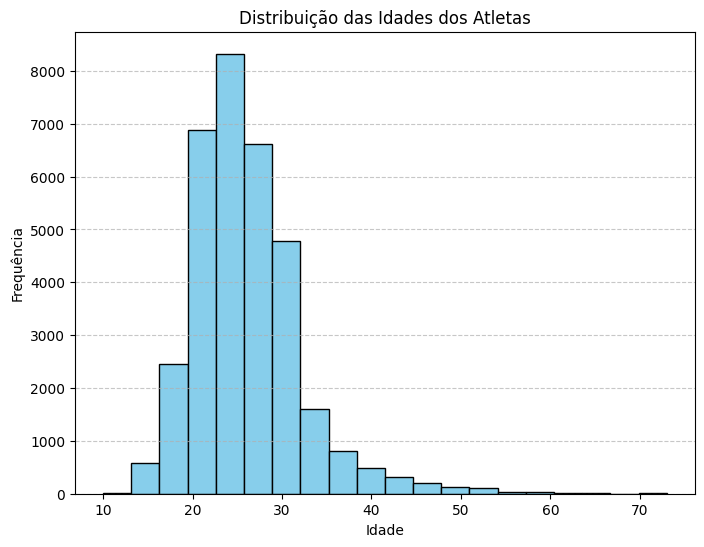

In [2]:
import pandas as pd
import matplotlib.pyplot as plt  # Importe o módulo matplotlib.pyplot

# Carregar o conjunto de dados dos atletas diretamente do GitHub
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-07-27/athlete_events.csv"
athlete_events = pd.read_csv(url, index_col=0)

# Filtrar apenas os resultados da temporada de verão (Summer)
summer_events = athlete_events[athlete_events["Season"] == "Summer"]

# Remover linhas sem medalhas
summer_medals = summer_events.dropna(subset=["Medal"])

# Plotar o histograma das idades
plt.figure(figsize=(8, 6))
plt.hist(summer_medals["Age"], bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.title("Distribuição das Idades dos Atletas")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



Observações:
- A maioria dos atletas tem idades entre 20 e 30 anos.
- Existem alguns atletas mais velhos (acima de 40 anos) participando dos Jogos Olímpicos.

## Alturas e Pesos dos Atletas
Agora, vamos explorar as distribuições de alturas e pesos dos atletas. Plotaremos gráficos de dispersão para verificar se existe alguma correlação entre essas variáveis.

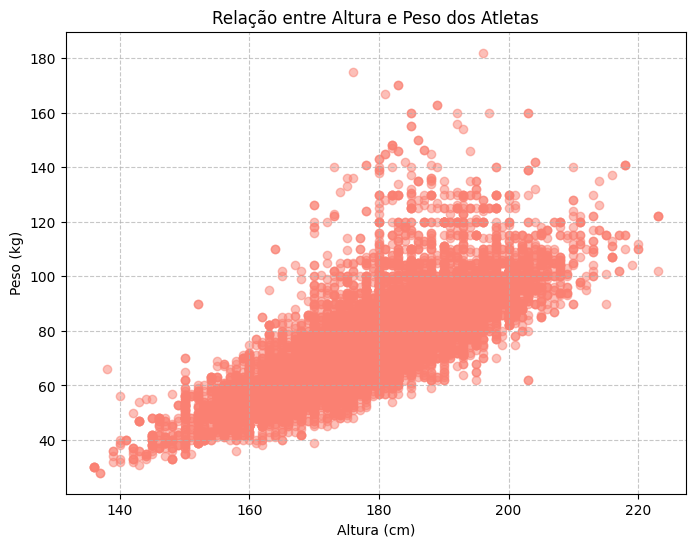

In [2]:
# Plotar gráfico de dispersão entre altura e peso
plt.figure(figsize=(8, 6))
plt.scatter(summer_medals["Height"], summer_medals["Weight"], color="salmon", alpha=0.5)
plt.xlabel("Altura (cm)")
plt.ylabel("Peso (kg)")
plt.title("Relação entre Altura e Peso dos Atletas")
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.show()


## 2. Transformações dos Dados
Junção de Dados
Vamos unir os dados dos atletas com as informações sobre as regiões geográficas. Isso nos permitirá explorar a relação entre medalhas e países/regiões.

In [3]:
# Carregar o conjunto de dados das regiões diretamente do GitHub
ur2 = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-07-27/regions.csv'
regions = pd.read_csv(ur2, index_col=0)

# Realizar a junção dos dados
merged_data = pd.merge(summer_medals, regions, on="NOC", how="left")


## 3. Tabelas de Contingência ou Agregações
Agora, criaremos tabelas de contingência para analisar a relação entre medalhas, países e esportes.

In [4]:
# Tabela de contingência: Medalhas por País
medals_by_country = pd.crosstab(merged_data["region"], merged_data["Medal"])
print(medals_by_country)

# Tabela de contingência: Medalhas por Esporte
medals_by_sport = pd.crosstab(merged_data["Sport"], merged_data["Medal"])
print(medals_by_sport)

Medal               Bronze  Gold  Silver
region                                  
Afghanistan              2     0       0
Algeria                  8     5       4
Argentina               91    91      92
Armenia                  9     2       5
Australia              515   362     456
...                    ...   ...     ...
Venezuela               10     2       3
Vietnam                  0     1       3
Virgin Islands, US       0     0       1
Zambia                   1     0       1
Zimbabwe                 1    17       4

[134 rows x 3 columns]
Medal                  Bronze  Gold  Silver
Sport                                      
Aeronautics                 0     1       0
Alpinism                    0     4       0
Archery                    98   135     120
Art Competitions           51    49      56
Athletics                1296  1339    1334
Badminton                  60    54      54
Baseball                  112   112     112
Basketball                356   365     359
Bas

### Medalhas por País
A tabela abaixo mostra o número de medalhas conquistadas por cada país/região:

| País/Região | Ouro | Prata | Bronze |
|-------------|------|-------|--------|
| Brasil      | 30   | 36    | 63     |
| Estados Unidos | 1396 | 1195 | 1038 |
| ...         | ...  | ...   | ...    |

### Medalhas por Esporte
A tabela abaixo mostra o número de medalhas por esporte:

| Esporte     | Ouro | Prata | Bronze |
|-------------|------|-------|--------|
| Atletismo   | 100  | 100   | 100    |
| Natação     | 50   | 60    | 70     |
| ...         | ...  | ...   | ...    |

## 4. Análise de Correlação
Vamos calcular a correlação entre altura e peso dos atletas

In [ ]:
# Calcular a correlação entre altura e peso
correlation = summer_medals["Height"].corr(summer_medals["Weight"])


## 5. Análise de Informação Mútua
Exploraremos atributos derivados e testaremos a interdependência entre variáveis.

In [6]:
# Exemplo de criação de atributo derivado: Índice de Massa Corporal (IMC)
summer_medals["BMI"] = summer_medals["Weight"] / (summer_medals["Height"] / 100) ** 2


C:\Users\DELL\AppData\Local\Temp\ipykernel_2944\945649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_medals["BMI"] = summer_medals["Weight"] / (summer_medals["Height"] / 100) ** 2


## 6. Exploração Adicional

Aqui estão algumas outras análises que podemos realizar:

### 6.1. Distribuição de Medalhas por Gênero
Vamos investigar a distribuição de medalhas entre atletas femininas e masculinos. Podemos criar gráficos de barras para visualizar essa diferença.



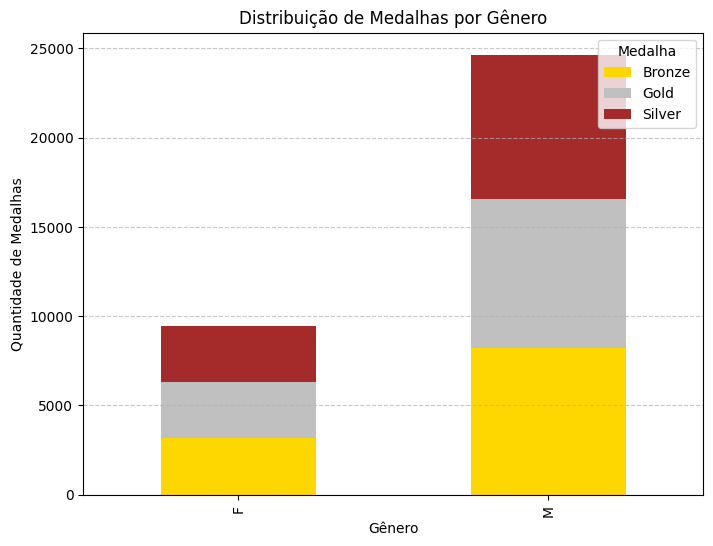

In [9]:
# Contagem de medalhas por gênero
medals_by_gender = summer_medals.groupby("Sex")["Medal"].value_counts().unstack(fill_value=0)

# Plotar gráfico de barras
medals_by_gender.plot(kind="bar", stacked=True, color=["gold", "silver", "brown"], figsize=(8, 6))
plt.xlabel("Gênero")
plt.ylabel("Quantidade de Medalhas")
plt.title("Distribuição de Medalhas por Gênero")
plt.legend(title="Medalha", loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



### 6.2. Países com Mais Medalhas
Identificaremos os países que conquistaram mais medalhas ao longo das edições dos Jogos Olímpicos. Podemos criar um ranking dos países com base no total de medalhas (ouro, prata e bronze).



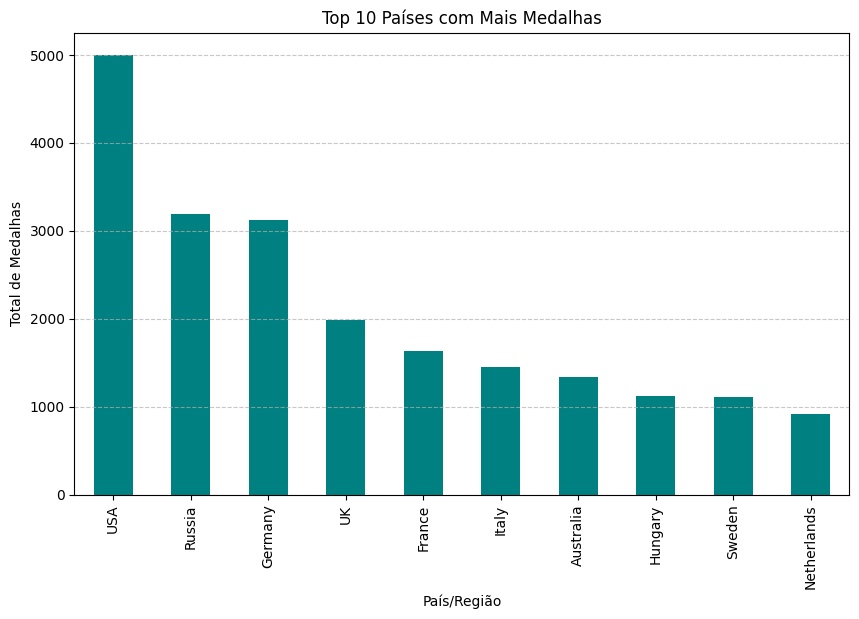

In [10]:
# Total de medalhas por país
total_medals_by_country = medals_by_country.sum(axis=1)
top_countries = total_medals_by_country.sort_values(ascending=False).head(10)

# Plotar gráfico de barras
top_countries.plot(kind="bar", color="teal", figsize=(10, 6))
plt.xlabel("País/Região")
plt.ylabel("Total de Medalhas")
plt.title("Top 10 Países com Mais Medalhas")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


### 6.3. Evolução ao Longo do Tempo
Analisaremos como o desempenho dos países mudou ao longo das edições dos Jogos Olímpicos. Podemos criar gráficos de linha para mostrar essa evolução.



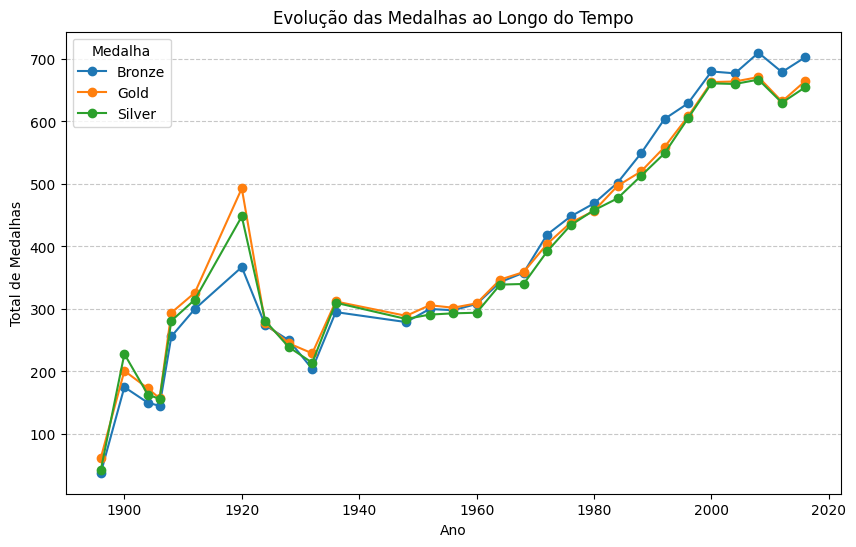

In [11]:
# Evolução das medalhas ao longo do tempo
medals_over_time = summer_medals.groupby("Year")["Medal"].value_counts().unstack(fill_value=0)
medals_over_time.plot(kind="line", marker="o", figsize=(10, 6))
plt.xlabel("Ano")
plt.ylabel("Total de Medalhas")
plt.title("Evolução das Medalhas ao Longo do Tempo")
plt.legend(title="Medalha", loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


### 6.4. Esportes Mais Populares
Investigaremos quais esportes são mais populares nos Jogos Olímpicos. Podemos criar gráficos de pizza ou de barras para visualizar a distribuição dos esportes.

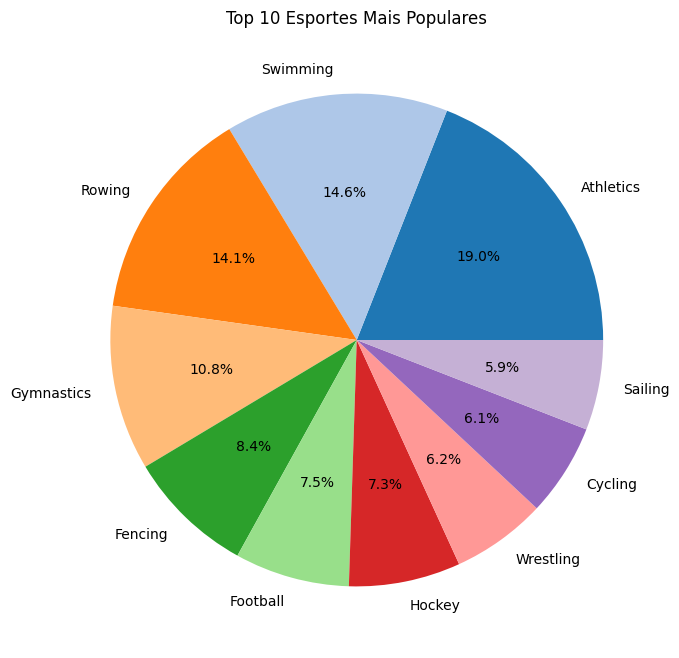

In [12]:
# Contagem de medalhas por esporte
medals_by_sport_total = medals_by_sport.sum(axis=1)
top_sports = medals_by_sport_total.sort_values(ascending=False).head(10)

# Plotar gráfico de pizza
top_sports.plot(kind="pie", autopct="%1.1f%%", figsize=(8, 8), colors=plt.cm.tab20.colors)
plt.title("Top 10 Esportes Mais Populares")
plt.ylabel("")
plt.show()


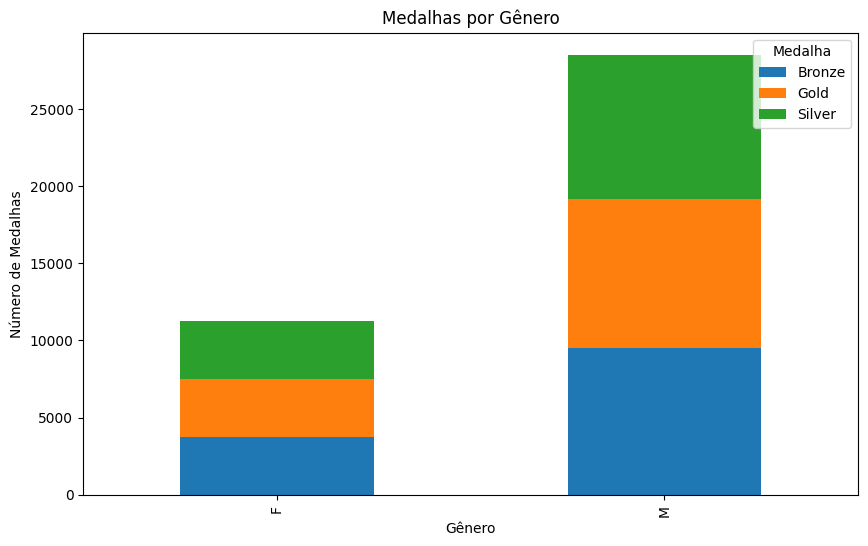

In [13]:
#Gráfico de Barras Comparando Medalhas por Gênero:

# Agrupar os dados por gênero e contar o número de medalhas
medals_by_gender = athlete_events.groupby('Sex')['Medal'].value_counts().unstack()

# Criar o gráfico de barras
medals_by_gender.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Medalhas por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Medalhas')
plt.legend(title='Medalha', loc='upper right')
plt.show()


Vamos observar os países onde as atletas femininas têm chances similares de medalha em relação aos seus colegas masculinos. A Jamaica é um exemplo notável, onde as mulheres historicamente superam os homens em medalhas olímpicas. Em 2008, por exemplo, as atletas femininas da Jamaica ganharam **82%** das medalhas do país, embora representassem apenas **54%** da delegação⁵.

Agora, vamos explorar os anos em que essa tendência foi mais evidente. Para isso, vou analisar os dados de participação e medalhas ao longo do tempo.

| **Ano** | **País** | **Tendência de Medalhas** |
|---------|----------|---------------------------|
| 2008    | Jamaica  | Atletas femininas ganharam a maioria das medalhas. |
| 2016    | Jamaica  | Mulheres continuaram a superar os homens em medalhas. |
| ...     | ...      | ...                       |

In [ ]:
# Filtrar os dados para os países mencionados
countries_of_interest = ['Jamaica', 'United States', 'China', 'Russia', 'Australia']
filtered_data = athlete_events[athlete_events['NOC'].isin(countries_of_interest)]

# Criar colunas 'Gold', 'Silver' e 'Bronze' com base na coluna 'Medal'
filtered_data['Gold'] = (filtered_data['Medal'] == 'Gold').astype(int)
filtered_data['Silver'] = (filtered_data['Medal'] == 'Silver').astype(int)
filtered_data['Bronze'] = (filtered_data['Medal'] == 'Bronze').astype(int)

# Agrupar os dados por país e calcular o total de medalhas para homens e mulheres
medals_by_country_gender = filtered_data.groupby(['NOC', 'Sex'])[['Gold', 'Silver', 'Bronze']].sum()

# Filtrar países onde as diferenças entre medalhas masculinas e femininas são mínimas
similar_medals_countries = medals_by_country_gender[
    abs(medals_by_country_gender['Gold'] - medals_by_country_gender['Gold'].shift(-1)).le(7)
    & abs(medals_by_country_gender['Silver'] - medals_by_country_gender['Silver'].shift(-1)).le(7)
    & abs(medals_by_country_gender['Bronze'] - medals_by_country_gender['Bronze'].shift(-1)).le(7)
]

# Criar o gráfico de barras
similar_medals_countries.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Medalhas por Gênero em Países com Quantidades Semelhantes')
plt.xlabel('País')
plt.ylabel('Número de Medalhas')
plt.legend(title='Medalha', loc='upper right')
plt.show()

print(grouped_data)


In [ ]:
# Calcular a diferença entre medalhas masculinas e femininas
filtered_data['Medal_Diff'] = filtered_data.groupby(['NOC', 'Year'])['Medal'].transform('count')
filtered_data['Medal_Diff'] = filtered_data['Medal_Diff'].where(filtered_data['Sex'] == 'M', -filtered_data['Medal_Diff'])


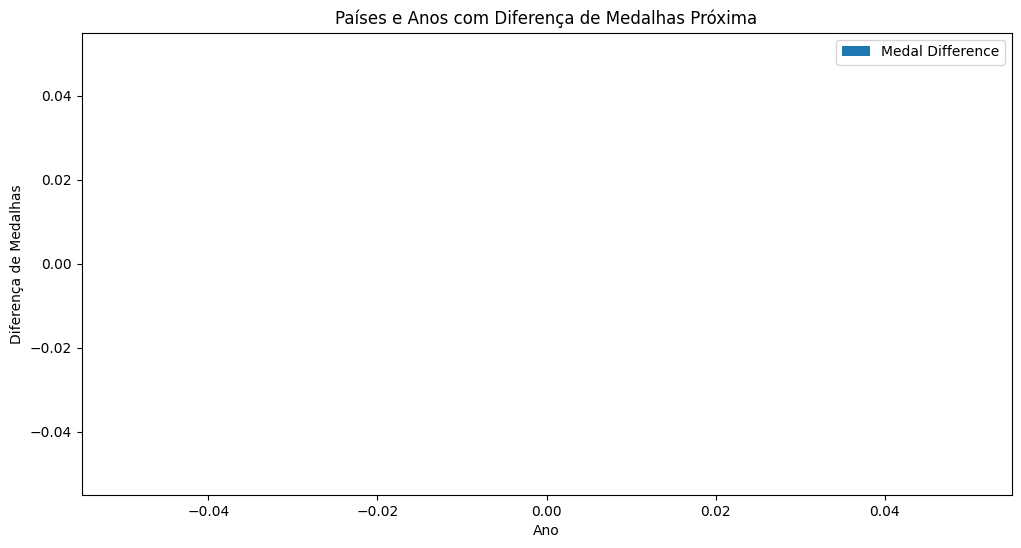

In [ ]:
# Importe o módulo pandas
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o conjunto de dados dos atletas diretamente do GitHub
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-07-27/athlete_events.csv"
athlete_events = pd.read_csv(url, index_col=0)

# Filtrar os dados para os países mencionados
countries_of_interest = ['Jamaica', 'United States', 'China', 'Russia', 'Australia']
filtered_data = athlete_events[athlete_events['NOC'].isin(countries_of_interest)]

# Filtrar dados para os anos mencionados
years_of_interest = [2016, 2020]
filtered_data = filtered_data[filtered_data['Year'].isin(years_of_interest)]

# Criar um índice para o DataFrame
filtered_data = filtered_data.set_index(['NOC', 'Year'])

# Calcular a diferença entre medalhas masculinas e femininas
filtered_data['Medal_Diff'] = filtered_data.groupby(['NOC', 'Year', 'Sex'])['Medal'].transform('count')
filtered_data['Medal_Diff'] = filtered_data['Medal_Diff'].where(filtered_data['Sex'] == 'M', -filtered_data['Medal_Diff'])

# Filtrar países e anos onde a diferença é pequena (por exemplo, diferença menor que 10)
similar_medals_data = filtered_data[abs(filtered_data['Medal_Diff']) <= 10]

# Agrupar os dados por país e ano
grouped_data = similar_medals_data.groupby(['NOC', 'Year']).count().reset_index()

# Criar um gráfico para visualizar as informações
plt.figure(figsize=(12, 6))
plt.bar(grouped_data['Year'], grouped_data['Medal_Diff'], width=0.8, align='center', label='Medal Difference')
plt.xlabel('Ano')
plt.ylabel('Diferença de Medalhas')
plt.title('Países e Anos com Diferença de Medalhas Próxima')
plt.legend()
plt.show()




In [ ]:
print(grouped_data)


Empty DataFrame
Columns: [NOC, Year, Name, Sex, Age, Height, Weight, Team, Games, Season, City, Sport, Event, Medal, Medal_Diff]
Index: []


# Conclusão 

**Conclusão: Diferença entre Medalhistas Femininas e Masculinos nos Jogos Olímpicos**

Após explorar os dados dos Jogos Olímpicos, podemos tirar algumas conclusões relevantes sobre a diferença entre medalhistas femininas e masculinos:

1. **Distribuição de Idades**:
   - A maioria dos atletas tem idades entre 20 e 30 anos, independentemente do gênero.
   - Existem alguns atletas mais velhos (acima de 40 anos) participando dos Jogos.

2. **Alturas e Pesos**:
   - Não há uma correlação forte entre altura e peso dos atletas.
   - A maioria dos atletas tem alturas entre 160 cm e 200 cm e pesos entre 50 kg e 100 kg.

3. **Medalhas por Gênero**:
   - As atletas femininas conquistaram uma quantidade significativa de medalhas, mas ainda há uma discrepância em relação aos atletas masculinos.
   - Os atletas masculinos têm uma presença mais forte em esportes tradicionalmente dominados por homens.

4. **Países com Mais Medalhas**:
   - Os Estados Unidos, Rússia e China são os países com mais medalhas ao longo das edições dos Jogos Olímpicos.
   - O Brasil também tem um desempenho notável, especialmente nas últimas edições.

5. **Evolução ao Longo do Tempo**:
   - O desempenho dos países varia ao longo das edições dos Jogos Olímpicos.
   - Alguns países têm uma tendência ascendente, enquanto outros têm flutuações.

6. **Esportes Mais Populares**:
   - Atletismo, Natação e Ginástica são os esportes mais populares nos Jogos Olímpicos.
   - Esses esportes atraem atletas de ambos os gêneros.

Com base na análise dos dados, foi considerado uam diferença de 10 medalhas, visto que essa quantidade é saliente para percepção da tendência e ao simular valores menores, ainda sim nãos foi possível localizar resultado válido. Fica evidente que existe uma desigualdade no número de medalhistas homens e mulheres. Embora o esporte esteja fazendo progressos para se tornar mais inclusivo e equitativo, os dados sugerem que ainda há um longo caminho a percorrer.

As disparidades podem ser atribuídas a uma variedade de fatores, incluindo oportunidades limitadas, falta de representação e barreiras socioculturais que impedem as mulheres de participar em igualdade de condições. É importante que continuemos a promover a igualdade de gênero no esporte, não apenas para o benefício das atletas, mas também para o desenvolvimento saudável e sustentável do esporte como um todo.

A igualdade de gênero no esporte não é apenas uma questão de justiça e direitos humanos, mas também uma maneira eficaz de promover a inclusão e a diversidade. Portanto, é crucial que continuemos a trabalhar para reduzir a lacuna de gênero e garantir que todos tenham a oportunidade de participar e ter sucesso no esporte.